In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/train_u6lujuX_CVtuZ9i.csv')

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Well some of the columns has the missing values. So I filled them mode of the respective columns.
Further there were several categorize labels, which were actually 'object' type.
I converted 'object' dtype to 'int' type manually using map()

In [5]:
df['Gender'] = df['Gender'].fillna( df['Gender'].dropna().mode().values[0] )
df['Married'] = df['Married'].fillna( df['Married'].dropna().mode().values[0] )
df['Dependents'] = df['Dependents'].fillna( df['Dependents'].dropna().mode().values[0] )
df['Self_Employed'] = df['Self_Employed'].fillna( df['Self_Employed'].dropna().mode().values[0] )
df['LoanAmount'] = df['LoanAmount'].fillna( df['LoanAmount'].dropna().mean() )
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna( df['Loan_Amount_Term'].dropna().mode().values[0] )
df['Credit_History'] = df['Credit_History'].fillna( df['Credit_History'].dropna().mode().values[0] )


df['Dependents'] = df['Dependents'].fillna('0').str.rstrip('+')
df['Gender'] = df['Gender'].map({'Female':0,'Male':1}).astype(int)
df['Married'] = df['Married'].map({'No':0, 'Yes':1}).astype(int)
df['Education'] = df['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(int)
df['Self_Employed'] = df['Self_Employed'].map({'No':0, 'Yes':1}).astype(int)
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1}).astype(int)
df['Dependents'] = df['Dependents'].fillna('0').str.rstrip('+')

In [6]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

Dividing the given train dataset in the form of features and target variables and further making use of get_dummies from pandas library

In [7]:
X,y  = df.iloc[:, 1:-1], df.iloc[:, -1]

In [8]:
X= pd.get_dummies(X)


In [9]:
loan_status_and_id = df[['Loan_ID', 'Loan_Status']]

# Concatenate 'Loan_Status' and 'Loan_ID' to X
X = pd.concat([X, loan_status_and_id], axis=1)
X

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,Loan_Status
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,True,False,False,False,False,False,True,LP001002,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,False,True,False,False,True,False,False,LP001003,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,True,False,False,False,False,False,True,LP001005,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,True,False,False,False,False,False,True,LP001006,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,True,False,False,False,False,False,True,LP001008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0,True,False,False,False,True,False,False,LP002978,1
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0,False,False,False,True,True,False,False,LP002979,1
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0,False,True,False,False,False,False,True,LP002983,1
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,False,False,True,False,False,False,True,LP002984,1


In [10]:
# dtrain= pd.get_dummies(X)
import xgboost as xgb
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV

train = X
target = 'Loan_Status'
IDcol = 'Loan_ID'

In [11]:
train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,Loan_Status
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,True,False,False,False,False,False,True,LP001002,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,False,True,False,False,True,False,False,LP001003,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,True,False,False,False,False,False,True,LP001005,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,True,False,False,False,False,False,True,LP001006,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,True,False,False,False,False,False,True,LP001008,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,1,0,2900,0.0,71.000000,360.0,1.0,True,False,False,False,True,False,False,LP002978,1
610,1,1,1,0,4106,0.0,40.000000,180.0,1.0,False,False,False,True,True,False,False,LP002979,1
611,1,1,1,0,8072,240.0,253.000000,360.0,1.0,False,True,False,False,False,False,True,LP002983,1
612,1,1,1,0,7583,0.0,187.000000,360.0,1.0,False,False,True,False,False,False,True,LP002984,1


In [12]:
train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,Loan_Status
0,1,0,1,0,5849,0.0,146.412162,360.0,1.0,True,False,False,False,False,False,True,LP001002,1
1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,False,True,False,False,True,False,False,LP001003,0
2,1,1,1,1,3000,0.0,66.000000,360.0,1.0,True,False,False,False,False,False,True,LP001005,1
3,1,1,0,0,2583,2358.0,120.000000,360.0,1.0,True,False,False,False,False,False,True,LP001006,1
4,1,0,1,0,6000,0.0,141.000000,360.0,1.0,True,False,False,False,False,False,True,LP001008,1


# I defined a function which will help us to create xgboost models and perform cross validation

In [13]:
from xgboost import XGBClassifier

predictors = [x for x in train.columns if x not in [target, IDcol]]

def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(
            xgb_param,
            xgtrain,
            num_boost_round=alg.get_params()['n_estimators'],
            nfold=cv_folds,
            metrics='auc',
            early_stopping_rounds=early_stopping_rounds
        )
        alg.set_params(n_estimators=cvresult.shape[0])

    # Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])

    # Predict training set
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]

    # Print model report
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[target], dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))

    # # Feature importances
    # feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)

    # # feat_imp.plot(kind='bar', title='Feature Importances')
    # # plt.ylabel('Feature Importance Score')
    # # plt.show()

    # Feature importances using get_fscore()
    # feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)

    # # Plot top features
    # plt.figure(figsize=(10, 6))
    # feat_imp[:12].plot(kind='bar', title='Top Feature Importances')  # Show top 12 features
    # plt.ylabel('Feature Importance Score')
    # plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    # plt.tight_layout()
    # plt.show()


In [14]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
predictors

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban']

In [15]:


# Initialize the model
xgb2 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=1000,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    n_jobs=4,  # Updated from nthread
    scale_pos_weight=1,
    random_state=27  # Updated from seed
)

# Fit the model
modelfit(xgb2, train, predictors)


Model Report
Accuracy : 0.9691
AUC Score (Train): 0.997087


# Parameter Tuning For XGBoost model
Parameter tuning like learning rate, some tree specific parameters like max_depth, min_child_weight, gamma, subsample, colsample_bytree.
Keeping all the parameters initially fixed, with the use of grid search :
Tuning max_depth and min_child_weight

max_depth - controls the max depth off each tree.

min_child_weight - controls the minimum sum of instance weights required in a child node.


Broader Range:-

In [16]:
param_test1 = {
    'max_depth': list(range(3, 10, 2)),
    'min_child_weight': list(range(1, 6, 2))
}

# Initialize GridSearchCV without 'iid' parameter
gsearch1 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        n_jobs=4,
        scale_pos_weight=1,
        random_state=27  # Updated from 'seed'
    ),
    param_grid=param_test1,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)
gsearch1.fit(train[predictors], train[target])
print("Best parameters after test 1:", gsearch1.best_params_)
print("Best AUC score after test 1:", gsearch1.best_score_)


Best parameters after test 1: {'max_depth': 7, 'min_child_weight': 5}
Best AUC score after test 1: 0.7691896218676406


In [17]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# Define the parameter grid for the second test
param_test2 = {
    'max_depth': [8, 9, 10],
    'min_child_weight': [4, 5, 6]
}

# Perform GridSearch with the updated parameters
gsearch2 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=5,
        min_child_weight=2,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        n_jobs=4,
        scale_pos_weight=1,
        random_state=27
    ),
    param_grid=param_test2,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)

# Fit the model
gsearch2.fit(train[predictors], train[target])

# Access the best parameters and best score
best_params = gsearch2.best_params_
best_score = gsearch2.best_score_

# Print the results
print("Best Parameters:", best_params)
print("Best AUC Score:", best_score)

# If you want to see the full cross-validation results:
cv_results = gsearch2.cv_results_

# Print all cross-validation results
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Mean AUC: {mean_score:.4f} | Parameters: {params}")


Best Parameters: {'max_depth': 9, 'min_child_weight': 4}
Best AUC Score: 0.7690604338901552
Mean AUC: 0.7658 | Parameters: {'max_depth': 8, 'min_child_weight': 4}
Mean AUC: 0.7660 | Parameters: {'max_depth': 8, 'min_child_weight': 5}
Mean AUC: 0.7637 | Parameters: {'max_depth': 8, 'min_child_weight': 6}
Mean AUC: 0.7691 | Parameters: {'max_depth': 9, 'min_child_weight': 4}
Mean AUC: 0.7660 | Parameters: {'max_depth': 9, 'min_child_weight': 5}
Mean AUC: 0.7637 | Parameters: {'max_depth': 9, 'min_child_weight': 6}
Mean AUC: 0.7669 | Parameters: {'max_depth': 10, 'min_child_weight': 4}
Mean AUC: 0.7660 | Parameters: {'max_depth': 10, 'min_child_weight': 5}
Mean AUC: 0.7637 | Parameters: {'max_depth': 10, 'min_child_weight': 6}


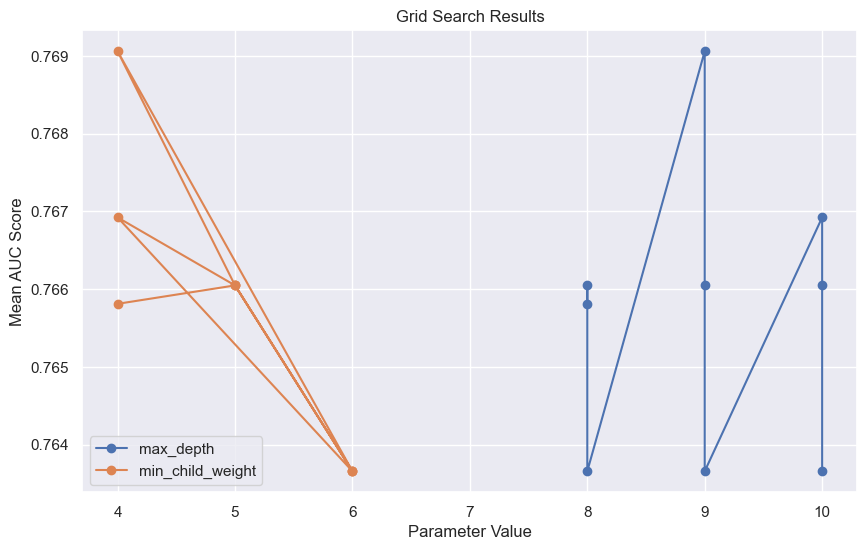

In [18]:

# Convert cv_results to DataFrame for easier plotting
results_df = pd.DataFrame(cv_results)

# Plot mean_test_score for each parameter combination
plt.figure(figsize=(10, 6))
for param in param_test2:
    plt.plot(results_df[f'param_{param}'], results_df['mean_test_score'], marker='o', linestyle='-', label=param)

plt.xlabel('Parameter Value')
plt.ylabel('Mean AUC Score')
plt.title('Grid Search Results')
plt.legend(loc='best')
plt.show()


In [19]:
param_test2b = {
    'min_child_weight': [6, 8, 10, 12]
}

# Perform GridSearchCV
gsearch2b = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=8,
        min_child_weight=2,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        n_jobs=4,
        scale_pos_weight=1,
        random_state=27  # Updated seed to random_state
    ),
    param_grid=param_test2b,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)

# Fit the model
gsearch2b.fit(train[predictors], train[target])

# Access the best parameters and best score
best_params_2b = gsearch2b.best_params_
best_score_2b = gsearch2b.best_score_

# Print the best parameters and AUC score
print("Best Parameters for Test 2b:", best_params_2b)
print("Best AUC Score for Test 2b:", best_score_2b)

# Access the full cross-validation results
cv_results_2b = gsearch2b.cv_results_

# Print cross-validation results for each parameter combination
for mean_score, params in zip(cv_results_2b['mean_test_score'], cv_results_2b['params']):
    print(f"Mean AUC: {mean_score:.4f} | Parameters: {params}")

Best Parameters for Test 2b: {'min_child_weight': 10}
Best AUC Score for Test 2b: 0.7725029579983139
Mean AUC: 0.7637 | Parameters: {'min_child_weight': 6}
Mean AUC: 0.7675 | Parameters: {'min_child_weight': 8}
Mean AUC: 0.7725 | Parameters: {'min_child_weight': 10}
Mean AUC: 0.7645 | Parameters: {'min_child_weight': 12}


In [20]:
param_test2c = {
    'min_child_weight': [6, 7]
}

# Perform GridSearchCV with the correct parameter grid
gsearch2c = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=8,
        min_child_weight=2,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        n_jobs=4,  # Updated from nthread
        scale_pos_weight=1,
        random_state=27  # Updated from seed
    ),
    param_grid=param_test2c,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)

# Fit the model
gsearch2c.fit(train[predictors], train[target])

# Access the best parameters and best score
best_params_2c = gsearch2c.best_params_
best_score_2c = gsearch2c.best_score_

# Print the best parameters and AUC score
print("Best Parameters for Test 2c:", best_params_2c)
print("Best AUC Score for Test 2c:", best_score_2c)

# Access the full cross-validation results
cv_results_2c = gsearch2c.cv_results_

# Print cross-validation results for each parameter combination
for mean_score, params in zip(cv_results_2c['mean_test_score'], cv_results_2c['params']):
    print(f"Mean AUC: {mean_score:.4f} | Parameters: {params}")

Best Parameters for Test 2c: {'min_child_weight': 7}
Best AUC Score for Test 2c: 0.7654547189996107
Mean AUC: 0.7637 | Parameters: {'min_child_weight': 6}
Mean AUC: 0.7655 | Parameters: {'min_child_weight': 7}


In [21]:
# # Print the best parameters found by GridSearchCV
# print("Best Parameters:", gsearch2c.best_params_)


# Tuning Gamma

In [22]:
param_test3 = {
    'gamma': [i / 10.0 for i in range(0, 5)]
}

# Perform GridSearchCV with the correct parameter grid
gsearch3 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=140,
        max_depth=8,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        n_jobs=4,  # Updated from nthread
        scale_pos_weight=1,
        random_state=27  # Updated from seed
    ),
    param_grid=param_test3,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)

# Fit the model
gsearch3.fit(train[predictors], train[target])

# Access the best parameters and best score
best_params_3 = gsearch3.best_params_
best_score_3 = gsearch3.best_score_

# Print the best parameters and AUC score
print("Best Parameters for Test 3:", best_params_3)
print("Best AUC Score for Test 3:", best_score_3)

# Access the full cross-validation results
cv_results_3 = gsearch3.cv_results_

# Print cross-validation results for each parameter combination
for mean_score, params in zip(cv_results_3['mean_test_score'], cv_results_3['params']):
    print(f"Mean AUC: {mean_score:.4f} | Parameters: {params}")

Best Parameters for Test 3: {'gamma': 0.0}
Best AUC Score for Test 3: 0.7636598661056866
Mean AUC: 0.7637 | Parameters: {'gamma': 0.0}
Mean AUC: 0.7626 | Parameters: {'gamma': 0.1}
Mean AUC: 0.7611 | Parameters: {'gamma': 0.2}
Mean AUC: 0.7615 | Parameters: {'gamma': 0.3}
Mean AUC: 0.7616 | Parameters: {'gamma': 0.4}


# Training results after Tuning:-

In [23]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)


Model Report
Accuracy : 0.8534
AUC Score (Train): 0.940771


# Tuning subsample and colsample_bytree

**subsample:**This specifies the fraction of the training samples used for growing each tree. Setting this less than 1 may help in avoiding overfitting.

**colsample_bytree:** This specifies the fraction of features (columns) used in each tree. A smaller value can help prevent overfitting but might reduce the strength of individual trees.

In [24]:
param_test4 = {
    'subsample': [i / 10.0 for i in range(6, 10)],
    'colsample_bytree': [i / 10.0 for i in range(6, 10)]
}

# Initialize GridSearchCV
gsearch4 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=177,
        max_depth=8,
        min_child_weight=6,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        n_jobs=4,  # Updated from nthread
        scale_pos_weight=1,
        random_state=27  # Updated from seed
    ),
    param_grid=param_test4,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)

# Fit the model
gsearch4.fit(train[predictors], train[target])

# Get the best parameters and best score
best_params_4 = gsearch4.best_params_
best_score_4 = gsearch4.best_score_

# Print the best parameters and AUC score
print("Best Parameters for Test 4:", best_params_4)
print("Best AUC Score for Test 4:", best_score_4)

# Access the full cross-validation results
cv_results_4 = gsearch4.cv_results_

# Print cross-validation results for each parameter combination
for mean_score, params in zip(cv_results_4['mean_test_score'], cv_results_4['params']):
    print(f"Mean AUC: {mean_score:.4f} | Parameters: {params}")

Best Parameters for Test 4: {'colsample_bytree': 0.9, 'subsample': 0.9}
Best AUC Score for Test 4: 0.775063223670035
Mean AUC: 0.7624 | Parameters: {'colsample_bytree': 0.6, 'subsample': 0.6}
Mean AUC: 0.7601 | Parameters: {'colsample_bytree': 0.6, 'subsample': 0.7}
Mean AUC: 0.7601 | Parameters: {'colsample_bytree': 0.6, 'subsample': 0.8}
Mean AUC: 0.7645 | Parameters: {'colsample_bytree': 0.6, 'subsample': 0.9}
Mean AUC: 0.7620 | Parameters: {'colsample_bytree': 0.7, 'subsample': 0.6}
Mean AUC: 0.7623 | Parameters: {'colsample_bytree': 0.7, 'subsample': 0.7}
Mean AUC: 0.7591 | Parameters: {'colsample_bytree': 0.7, 'subsample': 0.8}
Mean AUC: 0.7682 | Parameters: {'colsample_bytree': 0.7, 'subsample': 0.9}
Mean AUC: 0.7665 | Parameters: {'colsample_bytree': 0.8, 'subsample': 0.6}
Mean AUC: 0.7620 | Parameters: {'colsample_bytree': 0.8, 'subsample': 0.7}
Mean AUC: 0.7624 | Parameters: {'colsample_bytree': 0.8, 'subsample': 0.8}
Mean AUC: 0.7678 | Parameters: {'colsample_bytree': 0.8, '

In [25]:
# param_test4a = {
#     'subsample': [i / 10.0 for i in range(9, 12)],
#     'colsample_bytree': [i / 10.0 for i in range(9, 12)]
# }
param_test4a = {
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize GridSearchCV
gsearch4a = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=177,
        max_depth=8,
        min_child_weight=6,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        n_jobs=4,  # Updated from nthread
        scale_pos_weight=1,
        random_state=27  # Updated from seed
    ),
    param_grid=param_test4a,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)

# Fit the model
gsearch4a.fit(train[predictors], train[target])

# Get the best parameters and best score
best_params_4a = gsearch4a.best_params_
best_score_4a = gsearch4a.best_score_

# Print the best parameters and AUC score
print("Best Parameters for Test 4a:", best_params_4a)
print("Best AUC Score for Test 4a:", best_score_4a)

# Access the full cross-validation results
cv_results_4a = gsearch4a.cv_results_

# Print cross-validation results for each parameter combination
for mean_score, params in zip(cv_results_4a['mean_test_score'], cv_results_4a['params']):
    print(f"Mean AUC: {mean_score:.4f} | Parameters: {params}")

Best Parameters for Test 4a: {'colsample_bytree': 0.7, 'subsample': 0.7}
Best AUC Score for Test 4a: 0.7680053073861124
Mean AUC: 0.7680 | Parameters: {'colsample_bytree': 0.7, 'subsample': 0.7}
Mean AUC: 0.7583 | Parameters: {'colsample_bytree': 0.7, 'subsample': 0.8}
Mean AUC: 0.7675 | Parameters: {'colsample_bytree': 0.7, 'subsample': 0.9}
Mean AUC: 0.7633 | Parameters: {'colsample_bytree': 0.8, 'subsample': 0.7}
Mean AUC: 0.7612 | Parameters: {'colsample_bytree': 0.8, 'subsample': 0.8}
Mean AUC: 0.7661 | Parameters: {'colsample_bytree': 0.8, 'subsample': 0.9}
Mean AUC: 0.7644 | Parameters: {'colsample_bytree': 0.9, 'subsample': 0.7}
Mean AUC: 0.7663 | Parameters: {'colsample_bytree': 0.9, 'subsample': 0.8}
Mean AUC: 0.7664 | Parameters: {'colsample_bytree': 0.9, 'subsample': 0.9}


In [26]:
param_test5 = {
    'subsample': [i/100.0 for i in range(90, 101, 5)],  # e.g., [0.90, 0.95, 1.00]
    'colsample_bytree': [i/100.0 for i in range(90, 101, 5)]  # e.g., [0.90, 0.95, 1.00]
}

# Initialize GridSearchCV with the updated parameters
gsearch5 = GridSearchCV(
    estimator=XGBClassifier(
        learning_rate=0.1,
        n_estimators=177,
        max_depth=8,
        min_child_weight=6,
        gamma=0.1,
        objective='binary:logistic',
        n_jobs=4,
        scale_pos_weight=1,
        random_state=27
    ),
    param_grid=param_test5,
    scoring='roc_auc',
    n_jobs=4,
    cv=5
)

# Fit the model
gsearch5.fit(train[predictors], train[target])

# Retrieve results
print("Best Parameters for Test 5:", gsearch5.best_params_)
print("Best AUC Score for Test 5:", gsearch5.best_score_)

Best Parameters for Test 5: {'colsample_bytree': 1.0, 'subsample': 1.0}
Best AUC Score for Test 5: 0.7791357163648185


In [27]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, train, predictors)


Model Report
Accuracy : 0.8534
AUC Score (Train): 0.940771


# Tuning reg_alpha

In [28]:
param_test6 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

# Create the GridSearchCV object
gsearch6 = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1,
    n_estimators=177,
    max_depth=8,
    min_child_weight=6,
    gamma=0.1,
    subsample=0.95,
    colsample_bytree=0.95,
    objective='binary:logistic',
    n_jobs=4,
    scale_pos_weight=1,
    seed=27
),
param_grid = param_test6,
scoring='roc_auc',
n_jobs=4,
cv=5)

# Fit the GridSearchCV object
gsearch6.fit(train[predictors], train[target])

# Retrieve detailed results from the grid search
cv_results = gsearch6.cv_results_

# Best parameters
best_params = gsearch6.best_params_

# Best score
best_score = gsearch6.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best AUC Score:", best_score)

# Print detailed results
# import pandas as pd
results_df = pd.DataFrame(cv_results)
print(results_df[['params', 'mean_test_score', 'std_test_score']])

Best Parameters: {'reg_alpha': 1}
Best AUC Score: 0.7787868426722916
                 params  mean_test_score  std_test_score
0  {'reg_alpha': 1e-05}         0.774286        0.038145
1   {'reg_alpha': 0.01}         0.778715        0.036782
2    {'reg_alpha': 0.1}         0.774077        0.039234
3      {'reg_alpha': 1}         0.778787        0.037940
4    {'reg_alpha': 100}         0.500000        0.000000


In [29]:
param_test6a = {
    'reg_alpha': [1, 2, 3, 4, 5]
}

# Create the GridSearchCV object
gsearch6a = GridSearchCV(estimator = XGBClassifier(
    learning_rate=0.1,
    n_estimators=177,
    max_depth=8,
    min_child_weight=6,
    gamma=0.1,
    subsample=0.95,
    colsample_bytree=0.95,
    objective='binary:logistic',
    n_jobs=4,
    scale_pos_weight=1,
    seed=27
),
param_grid = param_test6a,
scoring='roc_auc',
n_jobs=4,
cv=5)

# Fit the GridSearchCV object
gsearch6a.fit(train[predictors], train[target])

# Retrieve detailed results from the grid search
cv_results = gsearch6a.cv_results_

# Best parameters
best_params = gsearch6a.best_params_

# Best score
best_score = gsearch6a.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best AUC Score:", best_score)

# Print detailed results
results_df = pd.DataFrame(cv_results)
print(results_df[['params', 'mean_test_score', 'std_test_score']])

Best Parameters: {'reg_alpha': 1}
Best AUC Score: 0.7787868426722916
             params  mean_test_score  std_test_score
0  {'reg_alpha': 1}         0.778787        0.037940
1  {'reg_alpha': 2}         0.772529        0.034293
2  {'reg_alpha': 3}         0.762652        0.041992
3  {'reg_alpha': 4}         0.752000        0.038746
4  {'reg_alpha': 5}         0.741776        0.040211


In [30]:

xgb3 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.9,
                     colsample_bytree=0.95, reg_alpha=1, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb3, train, predictors)


Model Report
Accuracy : 0.8176
AUC Score (Train): 0.920610


Features on larger scales can unduly influence the model. We want features on a similar scale. Scikit's preprocessing provides us with StandardScaler package to scale our data.

In [31]:
X,y  = df.iloc[:, 1:-1], df.iloc[:, -1]
X= pd.get_dummies(X)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# slc= StandardScaler()
# X_train_std = slc.fit_transform(X)
# Assume X and y are your feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_std = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_std = scaler.transform(X_test)



In [33]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)
print(X_train_std)
print(X_test_std)

     Gender  Married  Education  Self_Employed  ApplicantIncome  \
83        1        1          1              0             6000   
90        1        1          1              0             2958   
227       1        1          1              0             6250   
482       1        1          1              0             2083   
464       1        0          1              0             4166   
..      ...      ...        ...            ...              ...   
71        1        1          0              1             1875   
106       1        1          1              0            11417   
270       0        0          1              0             3237   
435       0        1          1              0            10047   
102       1        1          1              0            13650   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
83              2250.0  265.000000             360.0             1.0   
90              2900.0  131.000000             360.

# Applying machine learning models
 Using RandomForestClassifier with the parameters

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
forest = RandomForestClassifier(n_estimators =400, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)
# Fit the model on the training data
forest.fit(X_train_std, y_train)

# Predict on the test data
y_pred = forest.predict(X_test_std)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, forest.predict_proba(X_test_std)[:, 1])

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

# Print the OOB score
print(f"OOB Score: {forest.oob_score_:.4f}")

Accuracy: 0.7805
AUC Score: 0.7510
OOB Score: 0.7984


Using the above function of different XGBoost models and with grid search-cross validation, I found the effective value of each of the parameters

In [35]:
from xgboost.sklearn import XGBClassifier
# xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
#                      colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

xgb1.fit(X_train_std, y_train)

# Predict on the test data
y_pred = xgb1.predict(X_test_std)

# Predict probabilities for AUC score calculation
y_pred_proba = xgb1.predict_proba(X_test_std)[:, 1]


In [36]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

Accuracy: 0.7642
AUC Score: 0.7552


In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy',max_depth=1)
ada = AdaBoostClassifier(estimator=tree, n_estimators=500, learning_rate=0.1, random_state=0)

# Fit the AdaBoost model on the training data
ada.fit(X_train_std, y_train)
# Predict on the test data
y_pred_ada = ada.predict(X_test_std)

# Predict probabilities for AUC score calculation
y_pred_proba_ada = ada.predict_proba(X_test_std)[:, 1]

accuracy_ada = accuracy_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_proba_ada)

# Print the evaluation metrics
print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")
print(f"AdaBoost AUC Score: {roc_auc_ada:.4f}")

C:\Users\Aayush\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.7805
AdaBoost AUC Score: 0.6910


# Voting Classifier
I used VotingClassifier which will fit clones of those original estimators.

In [38]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(estimators=[('forest', forest), ('xgb', xgb1), ('adaboost', ada)], voting='soft')

In [39]:
eclf.fit(X_train_std, y_train)

C:\Users\Aayush\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('forest',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=400,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.95, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=N...
                                            max_delta_step=None, max_depth=8,
                                            max_leaves=None, min_child_weight=6,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            nthread=4, num_parallel_tree=None, ...)),
                             ('adaboost',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                  max_depth=1),
                                                 learning_rate=0.1,
                                                 n_estimators=500,
                                                 random_state=0))],
                 voting='soft')

In [40]:
# eclf.fit(X_train_std, y_train)
y_pred_voting = eclf.predict(X_test_std)

# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
roc_auc_voting = roc_auc_score(y_test, eclf.predict_proba(X_test_std)[:, 1])

# Print the evaluation metrics
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(f"Voting Classifier AUC Score: {roc_auc_voting:.4f}")

Voting Classifier Accuracy: 0.7886
Voting Classifier AUC Score: 0.7506


In [41]:
dtest = pd.read_csv('data/test_Y3wMUE5_7gLdaTN.csv')

# Similar approach is done on the competition given test data.

In [42]:
dtest

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [43]:
dtest['Gender'] = dtest['Gender'].fillna( dtest['Gender'].dropna().mode().values[0] )
dtest['Married'] = dtest['Married'].fillna( dtest['Married'].dropna().mode().values[0] )

In [44]:

dtest['Gender'] = dtest['Gender'].map({'Female':0,'Male':1})
dtest['Married'] = dtest['Married'].map({'No':0, 'Yes':1}).astype(int)
dtest['Education'] = dtest['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(int)
dtest['Self_Employed'] = dtest['Self_Employed'].map({'No':0, 'Yes':1})
dtest['Dependents'] = dtest['Dependents'].str.rstrip('+')
# dtest['Gender'] = dtest['Gender'].fillna( dtest['Gender'].dropna().mode().values[0]).astype(int)
dtest['Dependents'] = dtest['Dependents'].fillna( dtest['Dependents'].dropna().mode().values[0]).astype(int)
dtest['Self_Employed'] = dtest['Self_Employed'].fillna( dtest['Self_Employed'].dropna().mode().values[0])
dtest['LoanAmount'] = dtest['LoanAmount'].fillna( dtest['LoanAmount'].dropna().mode().values[0])
dtest['Loan_Amount_Term'] = dtest['Loan_Amount_Term'].fillna( dtest['Loan_Amount_Term'].dropna().mode().values[0])
dtest['Credit_History'] = dtest['Credit_History'].fillna( dtest['Credit_History'].dropna().mode().values[0] )

In [45]:
# Assuming X_train is the training data after pd.get_dummies()

# Create dummies for the test set
X_test = pd.get_dummies(dtest.iloc[:,1:])

# Ensure the test set has the same columns as the training set
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Apply the scaler to the aligned test set
X_test_std = scaler.transform(X_test)


In [46]:
# # dtest['Gender'].value_counts()
# X_test = dtest.iloc[:,1:]
# X_test = pd.get_dummies(X_test)
# X_test_std = scaler.transform(X_test)


In [47]:
# # Assuming you have already split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the test set
# X_test_std = scaler.transform(X_test)

# # Make predictions
# y_test_pred = eclf.predict(X_test_std)

# # Evaluate
# accuracy_test = accuracy_score(y_test, y_test_pred)
# roc_auc_test = roc_auc_score(y_test, eclf.predict_proba(X_test_std)[:, 1])

# print(f"Test Accuracy: {accuracy_test:.4f}")
# print(f"Test AUC Score: {roc_auc_test:.4f}")


 Predicting on the unseen dataset(test) using the voting classifier model

In [48]:

# # Predict using the ensemble classifier
y_test_pred = eclf.predict(X_test_std)

X_train_dummies = pd.get_dummies(X_train)  # Assuming X_train is already preprocessed
X_test_dummies = pd.get_dummies(X_test)

# Align the columns of test data with the train data
X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

# Standardize the test set
X_test_std = scaler.transform(X_test_dummies)

# Predict using the ensemble classifier
y_test_pred = eclf.predict(X_test_std)


In [49]:
print(f"Shape of dtest: {dtest.shape}")
print(f"Shape of X_test before get_dummies: {X_test.shape}")
print(f"Shape of X_train_dummies: {X_train_dummies.shape}")
print(f"Shape of X_test_dummies: {X_test_dummies.shape}")
print(f"Length of y_test_pred: {len(y_test_pred)}")


Shape of dtest: (367, 12)
Shape of X_test before get_dummies: (367, 16)
Shape of X_train_dummies: (491, 16)
Shape of X_test_dummies: (367, 16)
Length of y_test_pred: 367


In [50]:
# Preprocess dtest (367 rows)
dtest['Gender'] = dtest['Gender'].map({'Female':0,'Male':1}).fillna(dtest['Gender'].mode()[0])
dtest['Married'] = dtest['Married'].map({'No':0, 'Yes':1}).fillna(dtest['Married'].mode()[0])
dtest['Education'] = dtest['Education'].map({'Not Graduate':0, 'Graduate':1}).fillna(dtest['Education'].mode()[0])
dtest['Self_Employed'] = dtest['Self_Employed'].map({'No':0, 'Yes':1}).fillna(dtest['Self_Employed'].mode()[0])

# Ensure Dependents is treated as a string
dtest['Dependents'] = dtest['Dependents'].astype(str).str.rstrip('+')

# Handle missing values in Dependents
dtest['Dependents'] = dtest['Dependents'].fillna(dtest['Dependents'].mode()[0]).astype(int)

dtest['LoanAmount'] = dtest['LoanAmount'].fillna(dtest['LoanAmount'].mode()[0])
dtest['Loan_Amount_Term'] = dtest['Loan_Amount_Term'].fillna(dtest['Loan_Amount_Term'].mode()[0])
dtest['Credit_History'] = dtest['Credit_History'].fillna(dtest['Credit_History'].mode()[0])

# Extract features from all 367 rows (excluding Loan_ID)
X_test = dtest.iloc[:, 1:]

# Apply one-hot encoding (get_dummies) and reindex to match training columns
X_test_dummies = pd.get_dummies(X_test)
X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

# Standardize the test set
X_test_std = scaler.transform(X_test_dummies)

# Predict using the ensemble classifier
y_test_pred = eclf.predict(X_test_std)

# Assign predictions to the original dtest
dtest['Loan_Status'] = y_test_pred

# Keep only 'Loan_ID' and 'Loan_Status'
df_final = dtest[['Loan_ID', 'Loan_Status']].copy()

# Map 0 and 1 to 'N' and 'Y' for Loan_Status
df_final.loc[:, 'Loan_Status'] = df_final['Loan_Status'].map({0: 'N', 1: 'Y'})

df_final.to_csv('my_god.csv', index=False)

# Print final dataframe
print(df_final.head())


    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y


C:\Users\Aayush\AppData\Local\Temp\ipykernel_3288\3098857005.py:37: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'Y

In [51]:
dtest['Loan_Status'] = y_test_pred
df_final = dtest.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'], axis=1)

In [52]:
df_final['Loan_Status'] = df_final['Loan_Status'].map({0:'N', 1:'Y'})

In [53]:
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_test_pred: {len(y_test_pred)}")


Length of y_test: 123
Length of y_test_pred: 367


In [54]:
df_final.to_csv('data/my_submission8.csv', index=False)


In [55]:
df_final

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [56]:
import joblib

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')
scaler = joblib.load('scaler.pkl')


In [57]:
import tkinter as tk
from tkinter import messagebox
import numpy as np

# Assuming eclf is already trained and available
# Function to process data and predict loan eligibility
def predict_loan_status():
    try:
        # Get inputs from the user
        gender = int(entry_gender.get())
        married = int(entry_married.get())
        dependents = int(entry_dependents.get())
        education = int(entry_education.get())
        self_employed = int(entry_self_employed.get())
        applicant_income = float(entry_applicant_income.get())
        coapplicant_income = float(entry_coapplicant_income.get())
        loan_amount = float(entry_loan_amount.get())
        loan_amount_term = float(entry_loan_amount_term.get())
        credit_history = float(entry_credit_history.get())
        property_area = int(entry_property_area.get())

        # Create input data array (assuming this is the required structure)
        input_data = np.array([[gender, married, dependents, education, self_employed,
                                applicant_income, coapplicant_income, loan_amount,
                                loan_amount_term, credit_history, property_area]])

        # Standardize input data (using the same scaler you trained with)
        input_data_std = scaler.transform(input_data)

        # Predict using the trained model
        prediction = eclf.predict(input_data_std)

        # Display the result
        result = 'Yes' if prediction == 1 else 'No'
        messagebox.showinfo("Prediction", f"Loan Eligibility: {result}")
    except ValueError:
        messagebox.showerror("Input Error", "Please provide valid inputs")

# Set up the GUI window
root = tk.Tk()
root.title("Loan Eligibility Predictor")

# Define and place labels and entry fields
fields = ['Gender (0-Female, 1-Male)', 'Married (0-No, 1-Yes)', 'Dependents',
          'Education (0-Not Graduate, 1-Graduate)', 'Self Employed (0-No, 1-Yes)',
          'Applicant Income', 'Coapplicant Income', 'Loan Amount', 'Loan Amount Term',
          'Credit History (0 or 1)', 'Property Area (0-Rural, 1-Semiurban, 2-Urban)']

entries = {}
for i, field in enumerate(fields):
    label = tk.Label(root, text=field)
    label.grid(row=i, column=0, padx=10, pady=5)
    entry = tk.Entry(root)
    entry.grid(row=i, column=1, padx=10, pady=5)
    entries[field] = entry

# Assigning variables to each entry field
entry_gender = entries[fields[0]]
entry_married = entries[fields[1]]
entry_dependents = entries[fields[2]]
entry_education = entries[fields[3]]
entry_self_employed = entries[fields[4]]
entry_applicant_income = entries[fields[5]]
entry_coapplicant_income = entries[fields[6]]
entry_loan_amount = entries[fields[7]]
entry_loan_amount_term = entries[fields[8]]
entry_credit_history = entries[fields[9]]
entry_property_area = entries[fields[10]]

# Create and place a 'Submit' button
button = tk.Button(root, text="Predict Loan Eligibility", command=predict_loan_status)
button.grid(row=len(fields), column=0, columnspan=2, pady=10)

# Run the GUI loop
root.mainloop()
